In [3]:
#海外サッカーの試合における結果の予測

In [4]:
#1.必要なモジュールの読み込み

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels. api as sm

%matplotlib inline

In [6]:
#2.データの読み込み

In [7]:
# データを読み込んで変数 data に格納
data = pd.read_csv("england-premier-league-matches-2018-to-2019-stats.csv")

In [8]:
# データの最初の5行だけ表示
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


In [9]:
# Homeチームのゴール数の平均を計算して表示
data["home_team_goal_count"].mean()

1.568421052631579

In [10]:
# Awayチームのゴール数の平均を計算して表示
data["away_team_goal_count"].mean()

1.2526315789473683

In [11]:
#3.データ概要の把握

Text(0.5, 0, 'Score')

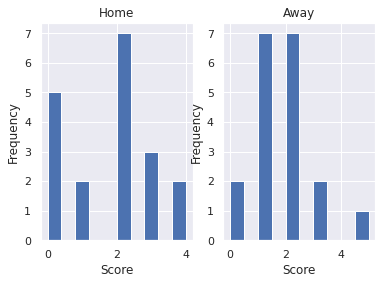

In [12]:
# プロットエリアを2つに分け、Urawaに関して「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
y1 = data[data["home_team_name"] == "Manchester United"]
y3 = y1["home_team_goal_count"]

y2 = data[data["away_team_name"] == "Manchester United"]
y4 = y2["away_team_goal_count"]

fig, ax = plt.subplots(1, 2)

y3.plot.hist(ax=ax[0])
ax[0].set_title("Home")
ax[0].set_xlabel("Score")

y4.plot.hist(ax=ax[1])
ax[1].set_title("Away")
ax[1].set_xlabel("Score")

Text(0.5, 0, 'Score')

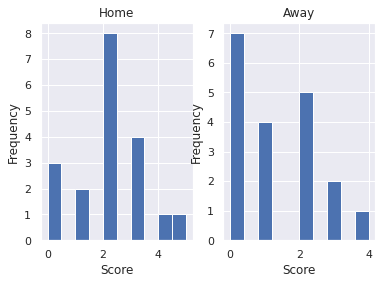

In [13]:
# もう1つ、どこか違うチームをピックアップして、同様に
# 「Homeで試合をしたときの得点のヒストグラム」と「Awayで試合をしたときの得点のヒストグラム」を表示
z1 = data[data["home_team_name"] == "Chelsea"]
z3 = z1["home_team_goal_count"]

z2 = data[data["away_team_name"] == "Chelsea"]
z4 = z2["away_team_goal_count"]

fig, ax = plt.subplots(1, 2)

z3.plot.hist(ax=ax[0])
ax[0].set_title("Home")
ax[0].set_xlabel("Score")

z4.plot.hist(ax=ax[1])
ax[1].set_title("Away")
ax[1].set_xlabel("Score")

In [14]:
#4.モデルの作成

In [15]:
# 説明変数：away_team_goal_count、home_team_nameとaway_team_nameを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_1 = smf.glm('home_team_goal_count ~ away_team_goal_count+home_team_name+away_team_name', data=data, family=sm.families.Poisson()).fit()
print('Model-1:',model_1.aic.round(3))

Model-1: 1160.489


In [16]:
# 説明変数：home_team_nameとaway_team_goal_countを指定し、ゴール数の予測に適切な確率分布で一般化線形モデルを構築し、AICを算出
model_2 = smf.glm('home_team_goal_count ~ away_team_goal_count+home_team_name', data=data, family=sm.families.Poisson()).fit()
print('Model-2:',model_2.aic.round(3))

Model-2: 1174.38


In [17]:
# 上記2つのモデルを比較し、選択すべき最適なモデルについて詳細を表示
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     home_team_goal_count   No. Observations:                  380
Model:                              GLM   Df Residuals:                      340
Model Family:                   Poisson   Df Model:                           39
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -540.24
Date:                  Mon, 11 Oct 2021   Deviance:                       345.91
Time:                          10:52:04   Pearson chi2:                     283.
No. Iterations:                       5                                         
Covariance Type:              nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.9001      0.246      3.656      0.000       0.418       1.383
home_team_name[T.Arsenal]                     0.3204      0.240      1.333      0.182      -0.151       0.791
home_team_name[T.Brighton & Hove Albion]     -0.4818      0.294     -1.640      0.101      -1.058       0.094
home_team_name[T.Burnley]                    -0.2407      0.275     -0.876      0.381      -0.779       0.298
home_team_name[T.Cardiff City]               -0.3837      0.286     -1.342      0.179      -0.944       0.177
home_team_name[T.Chelsea]                     0.2318      0.245      0.947      0.344      -0.248       0.712
home_team_name[T.Crystal Palace]             -0.4848      0.294     -1.651      0.099      -1.060       0.091
home_team_name[T.Everton]                    -0.0355      0.259     -0.137      0.891      -0.543       0.472
home_team_name[T.Fulham]                     -0.3123      0.282     -1.106      0.269      -0.866       0.241
home_team_name[T.Huddersfield Town]          -1.1020      0.366     -3.013      0.003      -1.819      -0.385
home_team_name[T.Leicester City]             -0.2539      0.275     -0.925      0.355      -0.792       0.284
home_team_name[T.Liverpool]                   0.5496      0.229      2.396      0.017       0.100       0.999
home_team_name[T.Manchester City]             0.5835      0.227      2.566      0.010       0.138       1.029
home_team_name[T.Manchester United]           0.0666      0.253      0.263      0.792      -0.429       0.562
home_team_name[T.Newcastle United]           -0.2629      0.274     -0.958      0.338      -0.800       0.275
home_team_name[T.Southampton]                -0.1242      0.266     -0.467      0.640      -0.645       0.397
home_team_name[T.Tottenham Hotspur]           0.0868      0.252      0.345      0.730      -0.407       0.580
home_team_name[T.Watford]                    -0.1691      0.269     -0.630      0.529      -0.695       0.357
home_team_name[T.West Ham United]             0.0338      0.255      0.133      0.894      -0.465       0.533
home_team_name[T.Wolverhampton Wanderers]    -0.1047      0.263     -0.397      0.691      -0.621       0.412
away_team_name[T.Arsenal]                    -0.2310      0.226     -1.021      0.307      -0.675       0.213
away_team_name[T.Brighton & Hove Albion]     -0.3609      0.232     -1.553      0.120      -0.816       0.095
away_team_name[T.Burnley]                    -0.2347      0.224     -1.048      0.295      -0.674       0.204
away_team_name[T.Cardiff City]               -0.3893      0.234     -1.660      0.097      -0.849       0.070
away_team_name[T.Chelsea]                    -0.4962      0.244     -2.033      0.042      

In [18]:
# home_team_name: Manchester United, away_team_name: Leicester Cityでaway_team_nameのチームが0得点だった場合のhome_team_nameの得点を予測
sampleData_1 = pd.DataFrame({"home_team_name":"Manchester United", "away_team_name":"Leicester City", "away_team_goal_count":0}, index=[0])
pred_1 = model_1.predict(sampleData_1)
pred_1

0    1.615781
dtype: float64

In [19]:
# home_team_name: Manchester United, away_team_name: Leicester Cityでaway_team_nameのチームが2得点だった場合のhome_team_nameの得点を予測
sampleData_2 = pd.DataFrame({"home_team_name":"Manchester United", "away_team_name":"Leicester City", "away_team_goal_count":2}, index=[0])
pred_2 = model_2.predict(sampleData_2)
pred_2

0    1.674989
dtype: float64

In [20]:
#5.シミュレーション

In [21]:
# Leicester Cityがaway_team_nameであるため、Leicester Cityのaway_team_nameでの得点平均を計算
p1 = data[data["away_team_name"] == "Leicester City"]
p2 = p1["away_team_goal_count"]
mean = p2.mean()

In [22]:
# 上記で求めた平均=lambda(強度：λ)としたポアソン分布から乱数を100個発生させる。
np.random.seed(100)
rvs_poisson= np.random.poisson(lam=mean, size=100)
rvs_poisson

array([1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 3, 0, 1, 1, 0, 2, 1, 2, 3, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 2, 3, 1, 1, 0, 4, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 1, 4, 5, 0, 0, 2, 1, 1, 3, 0, 1, 1, 1, 0, 2, 0, 1, 3, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 3, 1, 1, 0, 1, 3, 0, 3, 1, 3, 1, 4, 2, 1, 3, 0,
       2, 3, 2, 3, 1, 0, 4, 2, 2, 1, 1, 0])

In [23]:
# home_team_name: Manchester United, away_team_name: Leicester Cityでaway_team_nameのチームが 乱数発生させた得点だった場合のhome_team_nameの得点を予測
Home = []
for i in range(100):    
    Result = model_1.predict(pd.DataFrame({'home_team_name': ['Manchester United'], 'away_team_name': ['Leicester City'], 'away_team_goal_count':rvs_poisson[i]}))
    Home.append(Result[0])

In [24]:
# 予測したhome_team_nameの得点を使用し、home_team_name: Manchester United, away_team_name: Leicester Cityにおける Manchester Unitedの勝率を表示
print('home_team_nameの勝率は:', sum(Home > rvs_poisson), '%')

home_team_nameの勝率は: 60 %
